# Negishi dataset analysis

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import QED, Descriptors
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

### Show shape and features of dataset

In [4]:
data_df = pd.read_csv('negishi_full.csv')

In [5]:
data_df

,Reaction ID,References,Reaction: Links to Reaxys,Reactant 1,Reactant 2,Product,Yield,Reagent 1,Reagent 2,Reagent 3,Reagent 4,Solvent 1,Solvent 2,Solvent 3,Temp
0,31881337,"Article; Ichikawa, Musubu; Wakabayashi, Kenta;...",https://www.reaxys.com/reaxys/secured/hopinto....,BrC1=CC=CC(Br)=N1,Br[Zn]C1=NC=CC=C1,BrC1=CC=CC(=N1)C1=NC=CC=C1,0.540,M1,NaN,NaN,NaN,S1,NaN,NaN,T2
1,31881339,"Article; Ichikawa, Musubu; Wakabayashi, Kenta;...",https://www.reaxys.com/reaxys/secured/hopinto....,BrC1=CC=CC(=N1)C1=NC(Br)=CC=C1,Br[Zn]C1=NC=CC=C1,BrC1=NC(=CC=C1)C1=NC(=CC=C1)C1=NC=CC=C1,0.524,M1,NaN,NaN,NaN,S1,NaN,NaN,T2
2,28158154,Patent; Lianhua Science And Technology (Shangh...,https://www.reaxys.com/reaxys/secured/hopinto....,ClC1=CC=C(C=C1)C#N,Cl[Zn]C1=CC=CC=C1,N#CC1=CC=C(C=C1)C1=CC=CC=C1,0.650,M22,NaN,NaN,NaN,S1,NaN,NaN,T1
3,38472089,"Patent; HINMAN, Andrew W.; Davis, Dana; Kheife...",https://www.reaxys.com/reaxys/secured/hopinto....,COCOC1=CC(OCOC)=C(Br)C(C)=C1,Br[Zn]C1CCCCC1,COCOC1=CC(OCOC)=C(C2CCCCC2)C(C)=C1,0.850,L9,M4,NaN,NaN,S1,NaN,NaN,T2
4,47897146,"Article; Zheng, Shaojun; Yang, Dandan; Zhu, Ru...",https://www.reaxys.com/reaxys/secured/hopinto....,Cl[Zn]C#C,I\C=C\CCOC1CCCCO1,C#C\C=C\CCOC1CCCCO1,0.910,tetrabutyl ammonium fluoride,acetic acid,NaN,NaN,S1,NaN,NaN,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,35505756,"Article; Shiro, Tomoya; Kakiguchi, Keisuke; Ta...",https://www.reaxys.com/reaxys/secured/hopinto....,ClC1=CC=CC=C1C1=NC2=C(N1)C1=C(NC2=O)C=C(Br)C=C1,CC[Zn]CC,CCC1=CC2=C(C=C1)C1=C(N=C(N1)C1=C(Cl)C=CC=C1)C(...,0.820,M7,NaN,NaN,NaN,S1,S3,Hexachlorobutadiene,T1
6387,53330756,"Article; Skotnitzki, Juri; Kremsmair, Alexande...",https://www.reaxys.com/reaxys/secured/hopinto....,CCCCCC\C=C\I,C[C@@H](C[C@@H](C)C1=CC=CC=C1)[Zn]S[Si](C)(C)C,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.100,M10,NaN,NaN,NaN,S8,S4,pentane,T1
6388,53330754,"Article; Skotnitzki, Juri; Kremsmair, Alexande...",https://www.reaxys.com/reaxys/secured/hopinto....,CCCCCC\C=C\I,C[C@H](C[C@H](C)C1=CC=CC=C1)[Zn]C([Si](C)(C)C)...,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.550,M10,NaN,NaN,NaN,S8,S4,pentane,T1
6389,10309219,"Article; Williams, David R.; Kammler, David C....",https://www.reaxys.com/reaxys/secured/hopinto....,CC(O)C=CCC[C@H](C)C\C=C\I,C\C=C\[Zn]Br,C\C=C\C=C\C[C@@H](C)CCC=CC(C)O,0.740,M1,NaN,NaN,NaN,S1,S8,pentane,T1


### Build new dataset for statistical & chemical space analysis

In [6]:
pdt_df = data_df[['Product', 'Yield']]

In [7]:
pdt_df

,Product,Yield
0,BrC1=CC=CC(=N1)C1=NC=CC=C1,0.540
1,BrC1=NC(=CC=C1)C1=NC(=CC=C1)C1=NC=CC=C1,0.524
2,N#CC1=CC=C(C=C1)C1=CC=CC=C1,0.650
3,COCOC1=CC(OCOC)=C(C2CCCCC2)C(C)=C1,0.850
4,C#C\C=C\CCOC1CCCCO1,0.910
...,...,...
6386,CCC1=CC2=C(C=C1)C1=C(N=C(N1)C1=C(Cl)C=CC=C1)C(...,0.820
6387,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.100
6388,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.550
6389,C\C=C\C=C\C[C@@H](C)CCC=CC(C)O,0.740


### Calculate representative molecular descriptors in RDKit
16 properties are computed for each SMILES with successful RDKit mol generation.<br>
Unsuccessful mol generation returns null property vectors.

In [8]:
MolWt = []
MolLogP = []
TPSA = []
HeavyAtomCount = []
NumHeteroatoms = []
NumValenceElectrons = []
NumHAcceptors = []
NumHDonors = []
NumRotatableBonds = []
RingCount = []
NumAromaticHeterocycles = []
NumAromaticCarbocycles = []
NumSaturatedHeterocycles = []
NumSaturatedCarbocycles = []
FractionCSP3 = []
QED = []

for smi in pdt_df['Product']:
    if not Chem.MolFromSmiles(smi) == None:
        mol = Chem.MolFromSmiles(smi)
        MolWt.append(Descriptors.MolWt(mol))
        MolLogP.append(Descriptors.MolLogP(mol))
        TPSA.append(Descriptors.TPSA(mol))
        HeavyAtomCount.append(Descriptors.HeavyAtomCount(mol))
        NumHeteroatoms.append(Descriptors.NumHeteroatoms(mol))
        NumValenceElectrons.append(Descriptors.NumValenceElectrons(mol))
        NumHAcceptors.append(Descriptors.NumHAcceptors(mol))
        NumHDonors.append(Descriptors.NumHDonors(mol))
        NumRotatableBonds.append(Descriptors.NumRotatableBonds(mol))
        RingCount.append(Descriptors.RingCount(mol))
        NumAromaticHeterocycles.append(Descriptors.NumAromaticHeterocycles(mol))
        NumAromaticCarbocycles.append(Descriptors.NumAromaticCarbocycles(mol))
        NumSaturatedHeterocycles.append(Descriptors.NumSaturatedHeterocycles(mol))
        NumSaturatedCarbocycles.append(Descriptors.NumSaturatedCarbocycles(mol))
        FractionCSP3.append(Descriptors.FractionCSP3(mol))
        QED.append(Chem.QED.default(mol))
    else:
        MolWt.append('')
        MolLogP.append('')
        TPSA.append('')
        HeavyAtomCount.append('')
        NumHeteroatoms.append('')
        NumValenceElectrons.append('')
        NumHAcceptors.append('')
        NumHDonors.append('')
        NumRotatableBonds.append('')
        RingCount.append('')
        NumAromaticHeterocycles.append('')
        NumAromaticCarbocycles.append('')
        NumSaturatedHeterocycles.append('')
        NumSaturatedCarbocycles.append('')
        FractionCSP3.append('')
        QED.append('')

pdt_df['MolWt'] = MolWt
pdt_df['MolLogP'] = MolLogP
pdt_df['TPSA'] = TPSA
pdt_df['HeavyAtomCount'] = HeavyAtomCount
pdt_df['NumHeteroatoms'] = NumHeteroatoms
pdt_df['NumValenceElectrons'] = NumValenceElectrons
pdt_df['NumHAcceptors'] = NumHAcceptors
pdt_df['NumHDonors'] = NumHDonors
pdt_df['NumRotatableBonds'] = NumRotatableBonds
pdt_df['RingCount'] = RingCount
pdt_df['NumAromaticHeterocycles'] = NumAromaticHeterocycles
pdt_df['NumAromaticCarbocycles'] = NumAromaticCarbocycles
pdt_df['NumSaturatedHeterocycles'] = NumSaturatedHeterocycles
pdt_df['NumSaturatedCarbocycles'] = NumSaturatedCarbocycles
pdt_df['FractionCSP3'] = FractionCSP3
pdt_df['QED'] = QED

RDKit ERROR: [15:30:53] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [15:30:58] Explicit valence for atom # 12 N, 5, is greater than permitted
RDKit ERROR: [15:30:59] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [15:30:59] Explicit valence for atom # 12 O, 3, is greater than permitted
RDKit ERROR: [15:31:01] Explicit valence for atom # 16 B, 4, is greater than permitted
RDKit ERROR: [15:31:02] Explicit valence for atom # 15 B, 4, is greater than permitted
RDKit ERROR: [15:31:02] Explicit valence for atom # 15 O, 3, is greater than permitted
RDKit ERROR: [15:31:04] Explicit valence for atom # 16 C, 5, is greater than permitted
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [9]:
pdt_df

,Product,Yield,MolWt,MolLogP,TPSA,HeavyAtomCount,NumHeteroatoms,NumValenceElectrons,NumHAcceptors,NumHDonors,NumRotatableBonds,RingCount,NumAromaticHeterocycles,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumSaturatedCarbocycles,FractionCSP3,QED
0,BrC1=CC=CC(=N1)C1=NC=CC=C1,0.540,235.084,2.9061,25.78,13,3,64,2,0,1,2,2,0,0,0,0,0.709923
1,BrC1=NC(=CC=C1)C1=NC(=CC=C1)C1=NC=CC=C1,0.524,312.17,3.9681,38.67,19,4,92,3,0,2,3,3,0,0,0,0,0.672168
2,N#CC1=CC=C(C=C1)C1=CC=CC=C1,0.650,179.222,3.22528,23.79,14,1,66,1,0,1,2,0,2,0,0,0,0.658925
3,COCOC1=CC(OCOC)=C(C2CCCCC2)C(C)=C1,0.850,294.391,4.00812,36.92,21,4,118,4,0,7,2,0,1,0,1,0.647059,0.712051
4,C#C\C=C\CCOC1CCCCO1,0.910,180.247,2.1091,18.46,13,2,72,2,0,4,1,0,0,1,0,0.636364,0.487036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,CCC1=CC2=C(C=C1)C1=C(N=C(N1)C1=C(Cl)C=CC=C1)C(...,0.820,323.783,4.2872,61.54,23,5,114,2,2,2,4,2,2,0,0,0.111111,0.577864
6387,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.100,258.449,6.3429,0,19,0,106,0,0,9,1,0,1,0,0,0.578947,0.357769
6388,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.550,258.449,6.3429,0,19,0,106,0,0,9,1,0,1,0,0,0.578947,0.357769
6389,C\C=C\C=C\C[C@@H](C)CCC=CC(C)O,0.740,208.345,3.8621,20.23,15,1,86,1,1,7,0,0,0,0,0,0.571429,0.4973


### Convert property vector dtypes to float64

In [10]:
pdt_df.dtypes

Product                      object
Yield                       float64
MolWt                        object
MolLogP                      object
TPSA                         object
HeavyAtomCount               object
NumHeteroatoms               object
NumValenceElectrons          object
NumHAcceptors                object
NumHDonors                   object
NumRotatableBonds            object
RingCount                    object
NumAromaticHeterocycles      object
NumAromaticCarbocycles       object
NumSaturatedHeterocycles     object
NumSaturatedCarbocycles      object
FractionCSP3                 object
QED                          object
dtype: object

In [11]:
cols = list(pdt_df.columns)

In [12]:
cols.pop(0)

'Product'

In [13]:
pdt_df[cols] = pdt_df[cols].apply(pd.to_numeric, errors='coerce')

In [14]:
pdt_df.dtypes

Product                      object
Yield                       float64
MolWt                       float64
MolLogP                     float64
TPSA                        float64
HeavyAtomCount              float64
NumHeteroatoms              float64
NumValenceElectrons         float64
NumHAcceptors               float64
NumHDonors                  float64
NumRotatableBonds           float64
RingCount                   float64
NumAromaticHeterocycles     float64
NumAromaticCarbocycles      float64
NumSaturatedHeterocycles    float64
NumSaturatedCarbocycles     float64
FractionCSP3                float64
QED                         float64
dtype: object

In [15]:
pdt_df

,Product,Yield,MolWt,MolLogP,TPSA,HeavyAtomCount,NumHeteroatoms,NumValenceElectrons,NumHAcceptors,NumHDonors,NumRotatableBonds,RingCount,NumAromaticHeterocycles,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumSaturatedCarbocycles,FractionCSP3,QED
0,BrC1=CC=CC(=N1)C1=NC=CC=C1,0.540,235.084,2.90610,25.78,13.0,3.0,64.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.000000,0.709923
1,BrC1=NC(=CC=C1)C1=NC(=CC=C1)C1=NC=CC=C1,0.524,312.170,3.96810,38.67,19.0,4.0,92.0,3.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.000000,0.672168
2,N#CC1=CC=C(C=C1)C1=CC=CC=C1,0.650,179.222,3.22528,23.79,14.0,1.0,66.0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.000000,0.658925
3,COCOC1=CC(OCOC)=C(C2CCCCC2)C(C)=C1,0.850,294.391,4.00812,36.92,21.0,4.0,118.0,4.0,0.0,7.0,2.0,0.0,1.0,0.0,1.0,0.647059,0.712051
4,C#C\C=C\CCOC1CCCCO1,0.910,180.247,2.10910,18.46,13.0,2.0,72.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.636364,0.487036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,CCC1=CC2=C(C=C1)C1=C(N=C(N1)C1=C(Cl)C=CC=C1)C(...,0.820,323.783,4.28720,61.54,23.0,5.0,114.0,2.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0,0.111111,0.577864
6387,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.100,258.449,6.34290,0.00,19.0,0.0,106.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,0.578947,0.357769
6388,CCCCCC\C=C\[C@@H](C)C[C@@H](C)C1=CC=CC=C1,0.550,258.449,6.34290,0.00,19.0,0.0,106.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,0.0,0.578947,0.357769
6389,C\C=C\C=C\C[C@@H](C)CCC=CC(C)O,0.740,208.345,3.86210,20.23,15.0,1.0,86.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.497300


## Property vector statistical analysis

In [32]:
stats = pdt_df.describe().round(decimals=3)
stats.to_csv('negishi_stats.csv', float_format='%g')
stats

,Yield,MolWt,MolLogP,TPSA,HeavyAtomCount,NumHeteroatoms,NumValenceElectrons,NumHAcceptors,NumHDonors,NumRotatableBonds,RingCount,NumAromaticHeterocycles,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumSaturatedCarbocycles,FractionCSP3,QED
count,6391.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000,6383.000
mean,0.711,288.295,3.888,39.464,20.400,3.920,106.510,2.867,0.246,3.599,2.344,0.680,1.224,0.134,0.149,0.297,0.615
std,0.219,111.961,1.677,28.719,7.858,2.679,42.459,1.992,0.530,2.823,1.238,0.824,0.915,0.392,0.494,0.213,0.170
min,0.005,82.102,-1.691,0.000,6.000,0.000,32.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.036
25%,0.590,209.248,2.815,18.460,15.000,2.000,76.000,1.000,0.000,2.000,2.000,0.000,1.000,0.000,0.000,0.118,0.529
50%,0.760,263.243,3.639,35.530,19.000,3.000,98.000,3.000,0.000,3.000,2.000,0.000,1.000,0.000,0.000,0.273,0.649
75%,0.889,339.369,4.651,55.140,24.000,5.000,126.000,4.000,0.000,5.000,3.000,1.000,2.000,0.000,0.000,0.450,0.741
max,1.000,1209.098,17.401,213.580,80.000,28.000,456.000,17.000,6.000,31.000,9.000,5.000,7.000,4.000,4.000,0.943,0.946


## Plot yield distribution
Note 'ax.hist' can be replaced with 'ax.kde' for kernel density estimation

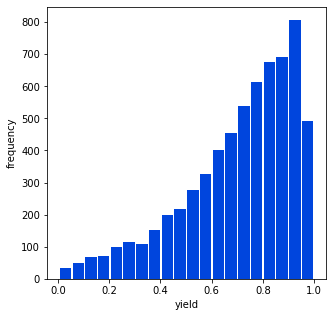

In [17]:
yield_hist, ax = plt.subplots(figsize=(5, 5))
ax.hist(pdt_df['Yield'], bins=20, rwidth=0.9, color=plt.get_cmap('winter')(0.27))
ax.set_xlabel('yield')
ax.set_ylabel('frequency')
yield_hist.savefig('negishi_yield_hist.png', dpi=300, bbox_inches='tight')

In [18]:
plt.close(yield_hist)

## Plot descriptor distributions
Again, 'axis.hist' can be replaced with 'axis.kde'

In [19]:
props = pdt_df.drop(['Product', 'Yield'], axis=1)

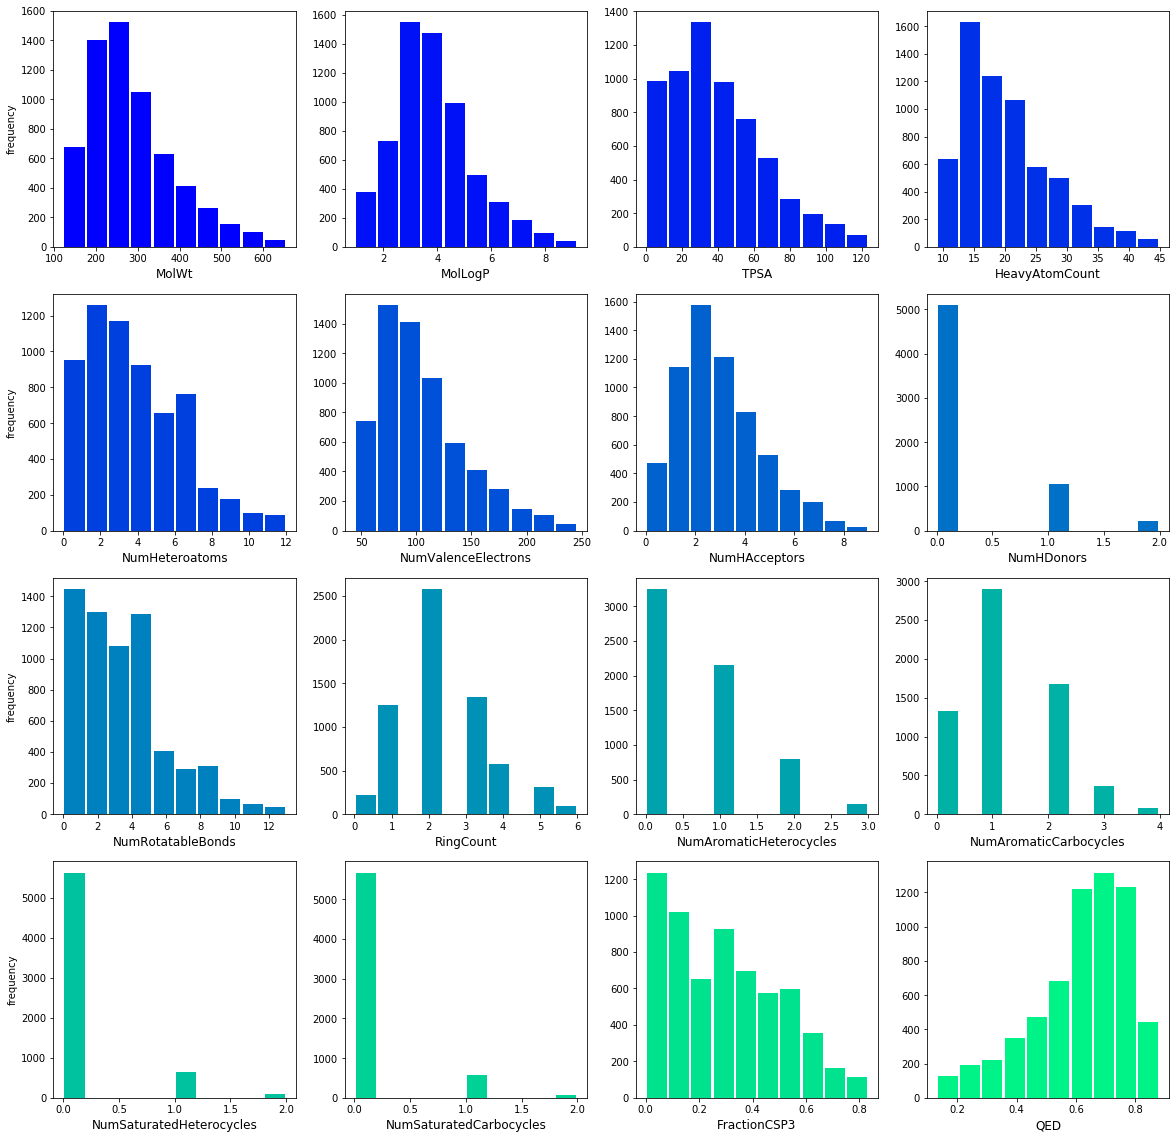

In [28]:
prop_hists, axes = plt.subplots(4, 4, figsize=(20, 20))
cmap = plt.get_cmap('winter')
kn = np.arange(len(props.columns))
for col, axis, k in zip(props.columns, axes.flatten(), kn):
    series = props[col]
    #removing outliers to avoid sparse tail distribution
    data = series[series.between(series.quantile(.01), series.quantile(.99))]
    axis.hist(data, rwidth=0.9, color=cmap(float(0.95*k)/kn.max()))
    axis.set_xlabel(col, fontsize=12)
    if (k+1)%4 == 1%4:
        axis.set_ylabel('frequency')
prop_hists.savefig('negishi_prop_hists.png', dpi=300, bbox_inches='tight')

In [29]:
plt.close(prop_hists)

# Negishi dictionary analysis

In [22]:
dict_df = pd.read_csv('negishi_dict_final.csv')
dict_df.head()

,metal_bin,metal_name,metal,ligand_bin,ligand_name,ligand,additive_bin,additive_name,additive,solvent_bin,solvent_name,solvent,temperature_bin,temperature_name,temperature
0,M1,tetrakis(triphenylphosphine) palladium(0),1902,L1,"1,1'-bis-(diphenylphosphino)ferrocene",233.0,A1,lithium chloride,243.0,S1,tetrahydrofuran,4525.0,T1,T<18,101.0
1,M2,tris-(dibenzylideneacetone)dipalladium(0),572,L2,"dicyclohexyl-(2',6'-dimethoxybiphenyl-2-yl)-ph...",196.0,A2,zinc,207.0,S2,"N,N-dimethyl-formamide",1003.0,T2,18≤T<23,2313.0
2,M3,bis-triphenylphosphine-palladium(II) chloride,418,L3,XPhos,187.0,A3,copper(l) iodide,154.0,S3,1-methyl-pyrrolidin-2-one,674.0,T3,23≤T<50,643.0
3,M4,palladium diacetate,370,L4,triphenylphosphine,161.0,A4,water,62.0,S4,toluene,541.0,T4,50≤T<61,975.0
4,M5,bis(dibenzylideneacetone)-palladium(0),344,L5,trifuran-2-yl-phosphane,128.0,A5,diisobutylaluminium hydride,59.0,S5,"1,4-dioxane",335.0,T5,61≤T<80,658.0


### Plot categorical label distributions

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


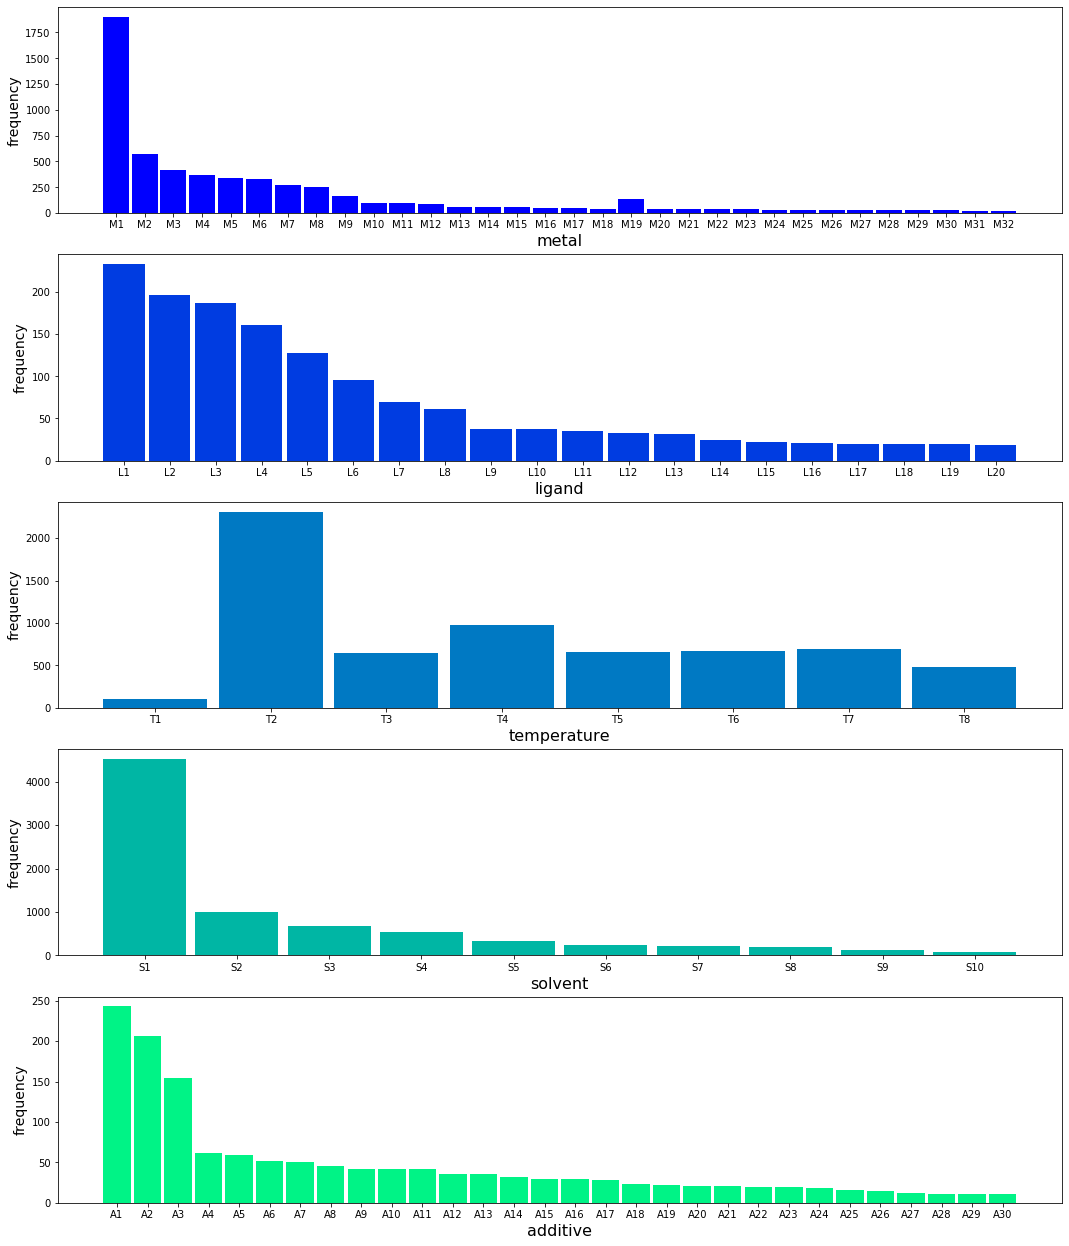

In [39]:
dict_X = ['metal_bin', 'ligand_bin', 'temperature_bin', 'solvent_bin', 'additive_bin']
dict_y = ['metal', 'ligand', 'temperature', 'solvent', 'additive']
dict_bars, dict_ax = plt.subplots(len(dict_X), 1, figsize=(18, 22))
dn = np.arange(len(dict_X))
for X, y, dax, d in zip(dict_X, dict_y, dict_ax, dn):
    sub_df = dict_df[[X, y]]
    sub_df.dropna(how='all', inplace=True)
    dax.bar(sub_df[X], sub_df[y], width=0.9, color=cmap(float(0.95*d)/dn.max()))
    dax.set_xlabel(y, fontsize=16)
    dax.set_ylabel('frequency', fontsize=14)
dict_bars.savefig('negishi_dict_bars.png', dpi=300, bbox_inches='tight')

In [40]:
plt.close(dict_bars)